In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [5]:
df.tarih=df.tarih.apply(pd.to_datetime)
df.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [6]:
df["yıl"]=df.tarih.dt.year
df["ay"]=df.tarih.dt.month
df=df.drop("tarih",axis=1)

In [7]:
df.describe()

,ürün besin değeri,ürün fiyatı,yıl,ay
count,227520.000000,227520.000000,227520.000000,227520.00000
mean,143.113924,16.348622,2018.000000,6.50000
std,133.218871,13.260935,1.414217,3.45206
min,8.000000,0.730000,2016.000000,1.00000
25%,41.000000,7.330000,2017.000000,3.75000
50%,83.000000,12.600000,2018.000000,6.50000
75%,250.000000,20.900000,2019.000000,9.25000
max,402.000000,141.330000,2020.000000,12.00000


In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df["ürün"]=le.fit_transform(df["ürün"])

df["ürün üretim yeri"]=le.fit_transform(df["ürün üretim yeri"])
df["market"]=le.fit_transform(df["market"])
df["şehir"]=le.fit_transform(df["şehir"])
df["yıl"]=le.fit_transform(df["yıl"])

In [9]:
df.head(20)

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,yıl,ay
0,65,120,et,33.41,1,2,0,0,1
1,70,103,et,11.22,1,2,0,0,1
2,61,160,et,11.12,1,2,0,0,1
3,1,354,sebze ve bakliyat,7.02,1,2,0,0,1
4,2,72,sebze ve bakliyat,13.14,1,2,0,0,1
5,3,42,sebze ve bakliyat,5.05,1,2,0,0,1
6,4,346,sebze ve bakliyat,5.97,1,2,0,0,1
7,5,47,sebze ve bakliyat,12.19,1,2,0,0,1
8,6,25,sebze ve bakliyat,12.15,1,2,0,0,1
9,7,47,sebze ve bakliyat,23.53,1,2,0,0,1


In [10]:
df.describe()

,ürün,ürün besin değeri,ürün fiyatı,ürün üretim yeri,market,şehir,yıl,ay
count,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,227520.00000
mean,39.000000,143.113924,16.348622,0.500000,1.000000,3.500000,2.000000,6.50000
std,22.803559,133.218871,13.260935,0.500001,0.816498,2.291293,1.414217,3.45206
min,0.000000,8.000000,0.730000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,19.000000,41.000000,7.330000,0.000000,0.000000,1.750000,1.000000,3.75000
50%,39.000000,83.000000,12.600000,0.500000,1.000000,3.500000,2.000000,6.50000
75%,59.000000,250.000000,20.900000,1.000000,2.000000,5.250000,3.000000,9.25000
max,78.000000,402.000000,141.330000,1.000000,2.000000,7.000000,4.000000,12.00000


<AxesSubplot:xlabel='ay', ylabel='ürün fiyatı'>

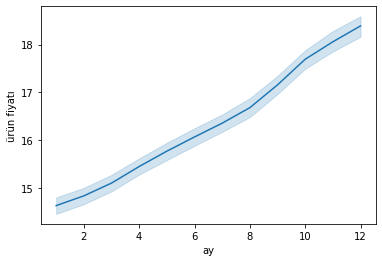

In [11]:
sns.lineplot(x=df.loc[:,"ay"],y=df["ürün fiyatı"])

In [12]:
df_cor=df.corr()
df_cov=df.cov()
df_cor["ürün fiyatı"]

ürün                 0.180560
ürün besin değeri    0.017858
ürün fiyatı          1.000000
ürün üretim yeri     0.001386
market              -0.002102
şehir               -0.001854
yıl                  0.436121
ay                   0.091105
Name: ürün fiyatı, dtype: float64

In [13]:
df_cov["ürün fiyatı"]

ürün                  54.600823
ürün besin değeri     31.548434
ürün fiyatı          175.852410
ürün üretim yeri       0.009191
market                -0.022759
şehir                 -0.056338
yıl                    8.178933
ay                     4.170549
Name: ürün fiyatı, dtype: float64

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ürün fiyatı', ylabel='Density'>

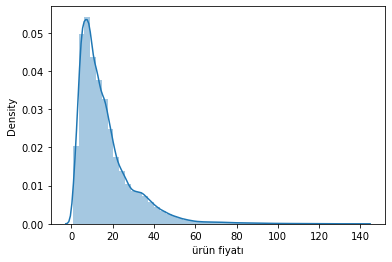

In [14]:
sns.distplot(df["ürün fiyatı"])

In [15]:
len(df)*0.02

4550.400000000001

In [16]:
df_1=df.sort_values("ürün fiyatı",ascending=False).iloc[4550:]

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ürün fiyatı', ylabel='Density'>

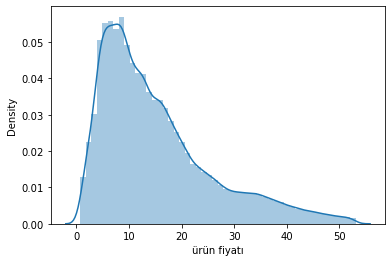

In [17]:
sns.distplot(df_1["ürün fiyatı"])

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()

In [20]:
x=df.loc[:,["yıl","ay","ürün","market","şehir","ürün üretim yeri"]]
y=df["ürün fiyatı"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation,Flatten

In [22]:

model = Sequential()
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse", metrics=['accuracy'])

In [23]:
history =model.fit(x_train, 
                y_train,
                validation_data=(x_test, y_test),
                epochs=300)

Epoch 1/300
4977/4977 [==============================] - 5s 989us/step - loss: 149.1082 - accuracy: 1.2558e-04 - val_loss: 134.3001 - val_accuracy: 1.7581e-04
Epoch 2/300
3589/4977 [====================>.........] - ETA: 1s - loss: 134.9269 - accuracy: 1.1319e-04

KeyboardInterrupt: 

In [ ]:
sonuc=model.predict(x_test)

In [ ]:
sonuc_df=pd.DataFrame(sonuc)

In [ ]:
writer = pd.ExcelWriter('pandas_3.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
sonuc.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
sonuc

In [ ]:
y_t2=pd.DataFrame(y_test)

In [ ]:
sonuc4=sonuc-y_test.values

In [ ]:
sonuc4.min()

In [ ]:
sonuc4.max()

In [21]:
sonuc4.mean()

NameError: name 'sonuc4' is not defined

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [23]:
hıst=lin_reg.fit(x_train,y_train)
sonuc2=hıst.predict(x_test)

In [24]:
asd=sonuc2-y_test
asd

208282     7.770335
199599   -20.224131
185287    13.843927
35909     -5.335881
175393    -6.839211
            ...    
39289      0.455234
147268    -0.968877
62732      3.952017
17481     -8.752814
208737     0.829933
Name: ürün fiyatı, Length: 68256, dtype: float64

In [25]:
asd.describe()

count    68256.000000
mean         0.081725
std         11.233303
min        -88.929298
25%         -5.670150
50%          2.233786
75%          7.551283
max         19.673122
Name: ürün fiyatı, dtype: float64

In [26]:
plt.scatter(sonuc,y_test,color='red')
plt.show()

NameError: name 'sonuc' is not defined

NameError: name 'history' is not defined

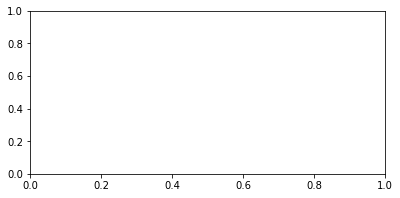

In [27]:
from matplotlib import pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
df_test=pd.read_csv("testFeatures.csv")
df_test.tarih=df_test.tarih.apply(pd.to_datetime)
df_test["yıl"]=df_Test.tarih.dt.year
df_test["ay"]=df_test.tarih.dt.month
df_test["ürün"]=le.fit_transform(df_test["ürün"])
df_test["ürün kategorisi"]=le.fit_transform(df_test["ürün kategorisi"])
df_test["ürün üretim yeri"]=le.fit_transform(df_test["ürün üretim yeri"])
df_test["market"]=le.fit_transform(df_test["market"])
df_test["şehir"]=le.fit_transform(df_test["şehir"])
x_test=df_test.loc[:,["yıl","ay","ürün","ürün besin değeri","ürün kategorisi"]]

NameError: name 'df_Test' is not defined

In [ ]:
df_test=df_test.drop(['id'], axis=1)
sonuc=model.predict(x_test)

In [ ]:
writer = pd.ExcelWriter('pandas_3.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
sonuc.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()